<a href="https://colab.research.google.com/github/srinivasanibmbangalore/OpenCVDeepLearningCertification/blob/master/OpenCV_Assignment_Sunglasses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import argparse
import dlib
import os
import shutil
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm
import dlib

In [2]:
matplotlib.rcParams['figure.figsize'] = (8.0,8.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/ml_data/OpenCVCertification/images'
mlPath='/content/gdrive/My Drive/ml_data/OpenCVCertification/pretrained_model/'
rainPath=root_path+"/rain_drop3.jpg"
gogglesPath=root_path+"/sunglass.png"
muskPath=root_path+"/musk.jpg"
highContrastPath=root_path+"/high_contrast_image.PNG"

dLibDataPath=mlPath+'/shape_predictor_68_face_landmarks.dat'


Mounted at /content/gdrive


In [5]:
imgMusk = cv2.imread(muskPath,1)
if (imgMusk.any() == None):
  print("Empty Musk Image")

imgSunglass = cv2.imread(gogglesPath,-1)
if (imgSunglass.any() == None):
  print("Empty Sunglass Image")

imgRaindrop = cv2.imread(rainPath,1)
if (imgRaindrop.any() == None):
  print("Empty Raindrop Image")

imgHighContr = cv2.imread(highContrastPath,1)
if (imgHighContr.any() == None):
  print("Empty Sundrop Image")

Text(0.5, 1.0, 'HighContrast Image')

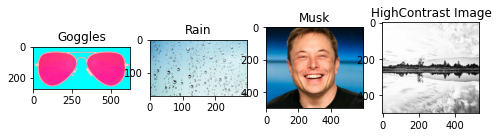

In [6]:
plt.figure()

ax = plt.subplot(1,4,1)
plt.imshow(imgSunglass[:,:,::-1],vmin=0, vmax=255)
ax.set_title("Goggles")
#ax.axis('off')


ax = plt.subplot(1,4,2)
plt.imshow(imgRaindrop[:,:,::-1],vmin=0, vmax=255)
ax.set_title("Rain")
#ax.axis('off')

ax = plt.subplot(1,4,3)
plt.imshow(imgMusk[:,:,::-1],vmin=0, vmax=255)
ax.set_title("Musk")
#ax.axis('off')

ax = plt.subplot(1,4,4)
plt.imshow(imgHighContr[:,:,::-1],vmin=0, vmax=255)
ax.set_title("HighContrast Image")
#ax.axis('off')


In [8]:
print("Shape of Musk ",imgMusk.shape)
print("Shape of Goggles ",imgSunglass.shape)
print("Shape of High Contrast Image ",imgHighContr.shape)
print("Shape of Raindrops Image ",imgRaindrop.shape)


Shape of Musk  (500, 600, 3)
Shape of Goggles  (273, 627, 4)
Shape of High Contrast Image  (496, 533, 3)
Shape of Raindrops Image  (171, 295, 3)


## Use DLib to detect faces and then keypoints - specifically eyes

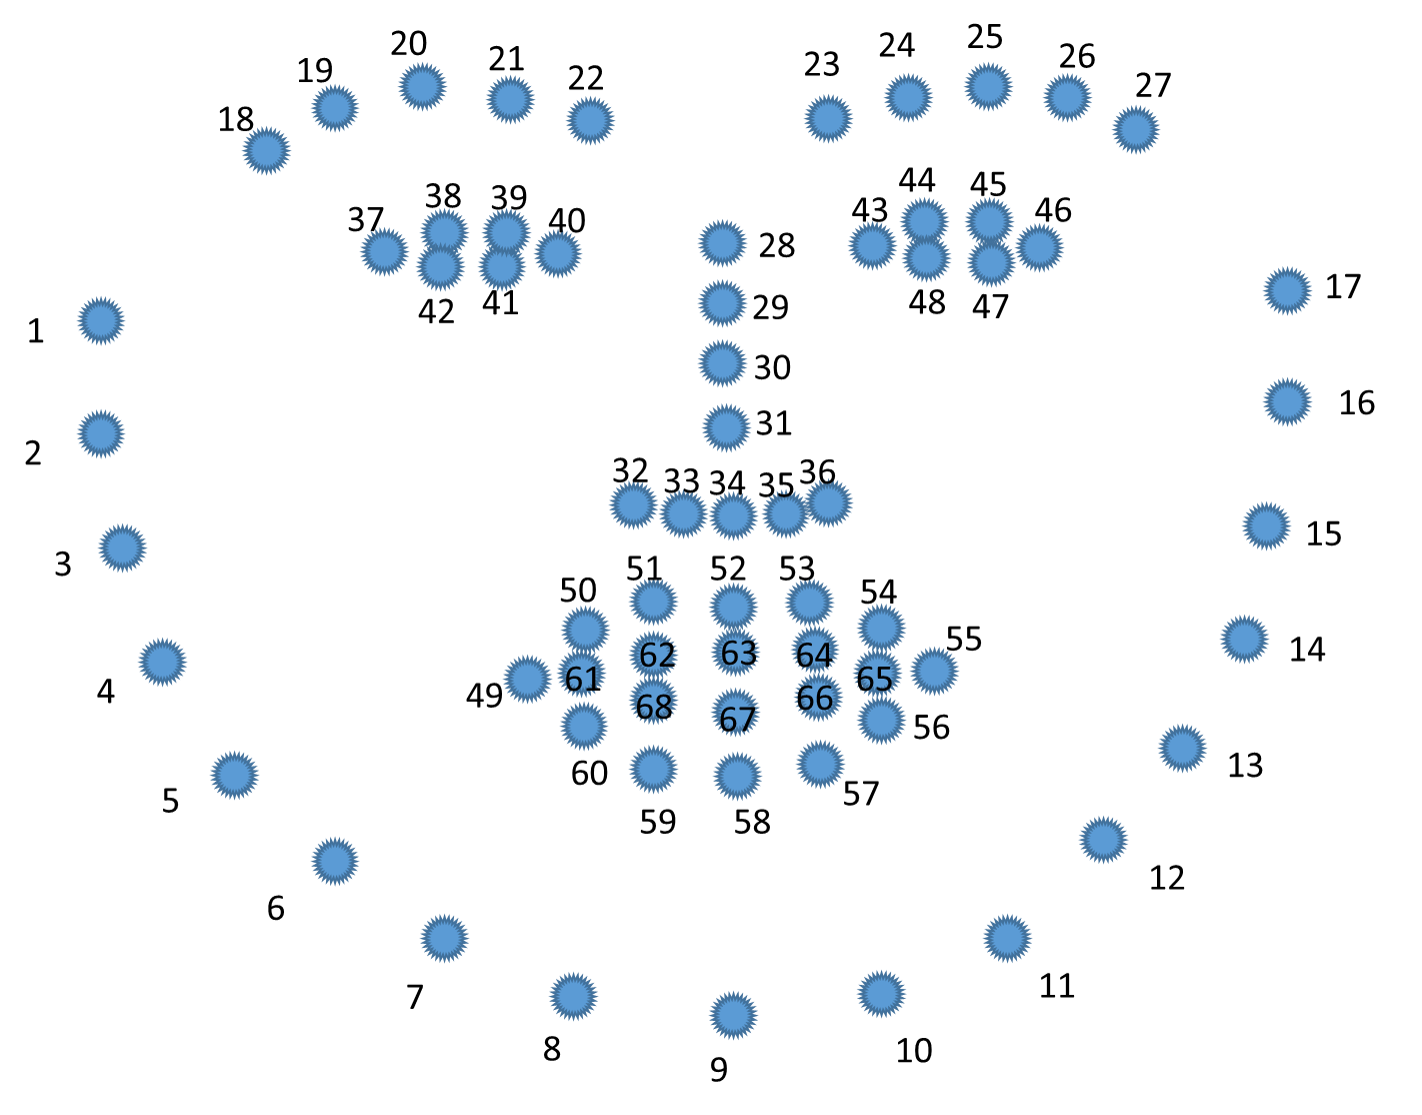

In [9]:
# Resizing the image given a fixed width.
def resize(img, width):
    r = float(width) / img.shape[1]
    dim = (width, int(img.shape[0] * r))
    img1 = img.copy()
    img1 = cv2.resize(img1, dim, interpolation=cv2.INTER_AREA)
    return img1

(583, 700, 3)

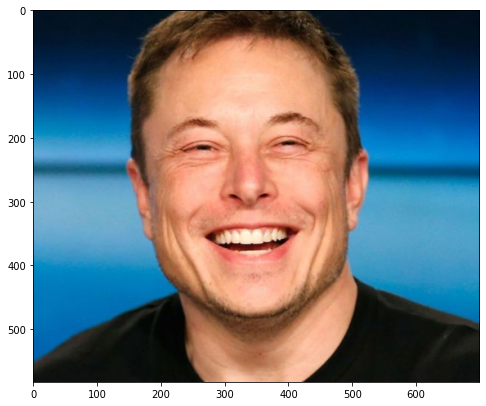

In [10]:
musk=resize(imgMusk,700)
plt.imshow(musk[:,:,::-1])
musk.shape

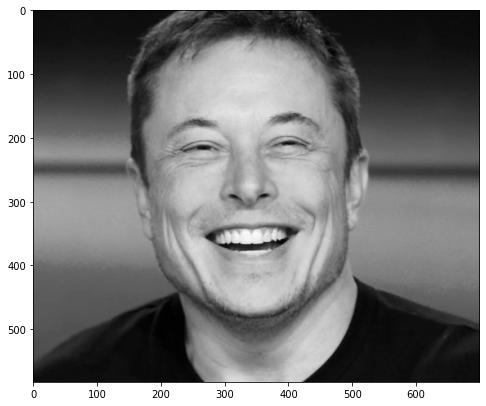

In [11]:
# Convert to Grayscale since dlib detector needs a grayscale image
musk_copy = musk.copy()
grayMusk = cv2.cvtColor(musk, cv2.COLOR_BGR2GRAY)
plt.imshow(grayMusk)

<bound method PyCapsule.left of rectangle(164,130,474,439)>
1
X1: 164  Y1: 130  X2: 474  Y2: 439


'\n x = d.left()\n y = d.top()\n w = d.right()\n h = d.bottom()\n'

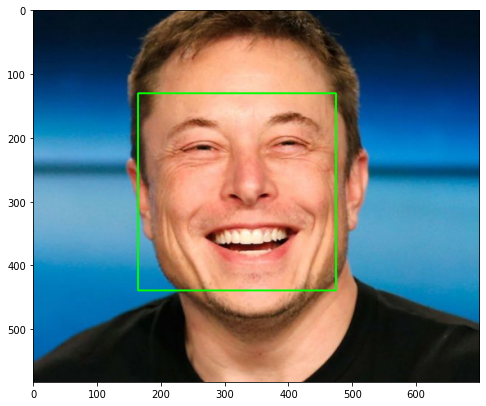

In [12]:
## Detect Face and put a bounding box around the face
detector = dlib.get_frontal_face_detector()
faces = detector(grayMusk)
for face in faces:
    print(face.left)
    x1,y1 = face.left(),face.top()
    x2,y2 = face.right(),face.bottom()
    imgFaceBound=cv2.rectangle(musk_copy,(x1,y1),(x2,y2),(0,255,0),2)
print(len(faces))
print("X1:",x1," Y1:",y1," X2:",x2," Y2:",y2)
plt.imshow(imgFaceBound[:,:,::-1])

'''
 x = d.left()
 y = d.top()
 w = d.right()
 h = d.bottom()
'''

[[179, 257], [183, 295], [187, 334], [194, 372], [210, 409], [238, 439], [273, 462], [313, 479], [354, 483], [393, 474], [428, 453], [459, 429], [482, 398], [491, 360], [492, 319], [491, 282], [490, 244], [210, 199], [225, 180], [248, 170], [274, 171], [297, 180], [366, 174], [389, 162], [414, 161], [438, 171], [452, 191], [334, 209], [336, 231], [338, 254], [339, 278], [310, 299], [324, 304], [340, 308], [355, 301], [367, 297], [244, 221], [260, 214], [276, 214], [292, 219], [276, 220], [261, 221], [374, 215], [390, 207], [406, 207], [422, 213], [407, 213], [392, 214], [266, 355], [292, 340], [320, 334], [341, 337], [363, 333], [393, 336], [419, 347], [397, 383], [369, 400], [344, 404], [322, 402], [292, 389], [274, 356], [321, 342], [341, 343], [364, 341], [410, 349], [366, 383], [343, 387], [321, 386]]


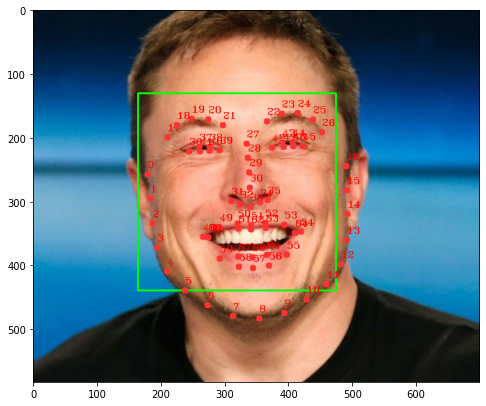

In [13]:
## Let us detect the eye. First step is to load the preloaded weights file.

predictor = dlib.shape_predictor(dLibDataPath)
facePoints = []
faceCoords=[]
for face in faces:
    x1,y1 = face.left(),face.top()
    x2,y2 = face.right(),face.bottom()
    faceCoords.append(([x1,y1],[x2,y2]))
    #imgFaceBound=cv2.rectangle(musk_copy,(x1,y1),(x2,y2),(0,255,0),2)
    landmarks = predictor(grayMusk,face)
    for n in range(68): # Dlib detects 68 key points
        x=landmarks.part(n).x
        y=landmarks.part(n).y
        facePoints.append([x,y])
        cv2.circle(musk_copy,(x,y),5,(50,50,255),cv2.FILLED) 
        cv2.putText(musk_copy,str(n),(x,y-10),cv2.FONT_HERSHEY_COMPLEX_SMALL,0.8,(0,0,255))
    print(facePoints)
plt.imshow(musk_copy[:,:,::-1])

        





In [14]:
def getKeyPointCoordinates(img,points):
    bbox = cv2.boundingRect(points)
    x,y,w,h = bbox
    lt = [y,x]
    rt = [y+h,x+w]
    return (lt,rt)


In [15]:
musk_copy1 = musk.copy()
facePoints = np.array(facePoints)
lEyeCrdns=getKeyPointCoordinates(musk,facePoints[36:41])
rEyeCrdns=getKeyPointCoordinates(musk,facePoints[42:47])
print(lEyeCrdns,rEyeCrdns)



([214, 244], [222, 293]) ([207, 374], [216, 423])


218 , 268 :, 212 , 398
333.0


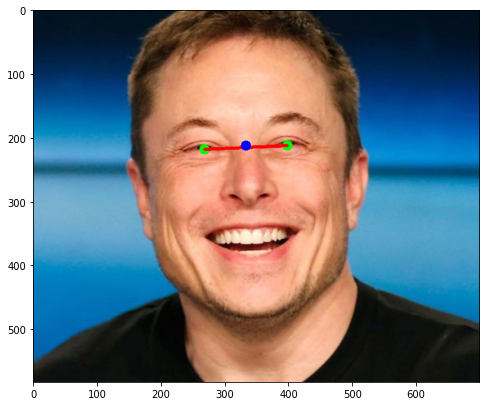

In [16]:
musk_copy1 = musk.copy()
ly=round((lEyeCrdns[0][0]+lEyeCrdns[1][0])/2)
lx = round((lEyeCrdns[0][1]+lEyeCrdns[1][1])/2)
ry=round((rEyeCrdns[0][0]+rEyeCrdns[1][0])/2)
rx = round((rEyeCrdns[0][1]+rEyeCrdns[1][1])/2)
eye_center = (rx+lx) / 2
print(ly,",",lx,":,",ry,",",rx)
lImg = cv2.circle(musk_copy1,(lx,ly),8,(0,250,0),cv2.FILLED)
lImg = cv2.circle(lImg,(rx,ry),8,(0,250,0),cv2.FILLED)
lImg = cv2.line(lImg,(lx,ly),(rx,ry),(0,0,255),4)
lImg = cv2.circle(lImg,(round(eye_center),ry),8,(255,0,0),cv2.FILLED)
plt.imshow(lImg[:,:,::-1])


print(eye_center)

In [17]:
print(faceCoords)
faceWidth = faceCoords[0][1][0] - faceCoords[0][0][0]
faceHeight = faceCoords[0][1][1] - faceCoords[0][0][1]
print("Width =",faceWidth)
print("Height =",faceHeight)
glass_trans = int(.1 * (eye_center - faceCoords[0][0][1]))
print(glass_trans)


[([164, 130], [474, 439])]
Width = 310
Height = 309
20


(134, 310, 4)


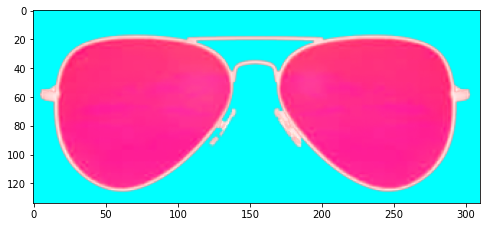

In [26]:
glasses_resize = resize(imgSunglass, faceWidth)
plt.imshow(glasses_resize[:,:,::-1])
print(glasses_resize.shape)

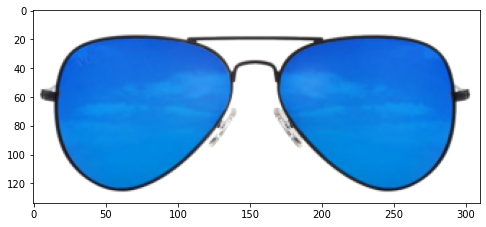

In [19]:
overlay_img = glasses_resize[:,:,0:3]
plt.imshow(overlay_img[:,:,::-1])

(134, 310, 3)
(134, 310, 3)


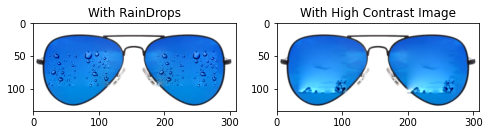

In [29]:
print(overlay_img.shape)
overlay_raindrop_img=seamlessClone_Raindrop(overlay_img,imgRaindrop)
#plt.imshow(overlay_raindrop_img[:,:,::-1],vmin=0, vmax=255)
overlay_highcontrast_img=seamlessClone_contrast(overlay_img,imgHighContr)

plt.figure()

ax = plt.subplot(1,2,1)
plt.imshow(overlay_raindrop_img[:,:,::-1])
ax.set_title("With RainDrops")
#ax.axis('off')


ax = plt.subplot(1,2,2)
plt.imshow(overlay_highcontrast_img[:,:,::-1])
ax.set_title("With High Contrast Image")
#ax.axis('off')

print(overlay_raindrop_img.shape)

In [21]:
def seamlessClone_Raindrop(glassBGR,imgRain):
    cropR = imgRain[20:80,50:150]
    
    src_mask1 = 255 * np.ones(cropR.shape, cropR.dtype)
    center = (70,70)
    output = cv2.seamlessClone(cropR,glassBGR, src_mask1, center, cv2.NORMAL_CLONE)
    #plt.imshow(output[:,:,::-1],vmin=0, vmax=255)

    center2 = (235,70)
    output2 = cv2.seamlessClone(cropR,output, src_mask1, center2, cv2.NORMAL_CLONE)
    #plt.imshow(output2[:,:,::-1],vmin=0, vmax=255)

    return output2

In [22]:
def seamlessClone_contrast(glassBGR,imgHighContr):

    half = cv2.resize(imgHighContr, (0, 0), fx = 0.5, fy = 0.5)
    cropC = half[40:120,40:120]
    src_mask3 = 255 * np.ones(cropC.shape, cropC.dtype)
    center3 = (70,70)
    output3 = cv2.seamlessClone(cropC,glassBGR, src_mask3, center3, cv2.NORMAL_CLONE)

    center4 = (235,70)
    output4 = cv2.seamlessClone(cropC,output3, src_mask3, center4, cv2.NORMAL_CLONE)


    return output4


In [24]:
#Combine an image that has a transparency alpha channel
def blend_transparent(face_img, sunglasses_img):

    #glassBGR = glassPNG[:,:,0:3]
    #glassMask1 = glassPNG[:,:,3] 
   
    print("Shape of glass is " ,sunglasses_img.shape)
 
    overlay_img = sunglasses_img[:,:,0:3]
    overlay_mask = sunglasses_img[:,:,3:]
     
    background_mask = 255 - overlay_mask
 
    overlay_mask = cv2.cvtColor(overlay_mask, cv2.COLOR_GRAY2BGR)
    background_mask = cv2.cvtColor(background_mask, cv2.COLOR_GRAY2BGR)
 
    face_part = (face_img * (1 / 255.0)) * (background_mask * (1 / 255.0))
    overlay_part = (overlay_img * (1 / 255.0)) * (overlay_mask * (1 / 255.0))
 
    return np.uint8(cv2.addWeighted(face_part, 255, overlay_part, 255, 0))
    

In [25]:
yG, xG, cG = glasses_resize.shape
print(yG,xG,cG)

134 310 4


Shape of glass is  (134, 310, 4)


(134, 310, 3)

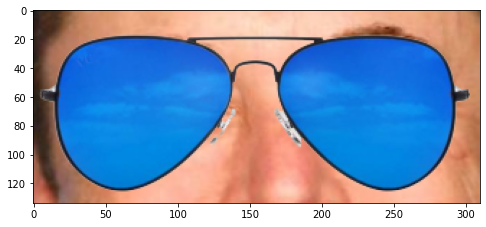

In [154]:
musk_copy2 = musk.copy()
h5, w5, s5 = glasses_resize.shape
rec_resize = musk_copy2[y1 + glass_trans:y1 + h5 + glass_trans, x1:x1 + w5]
blend_glass3 = blend_transparent(rec_resize , glasses_resize)
plt.imshow(blend_glass3[:,:,::-1])
blend_glass3.shape


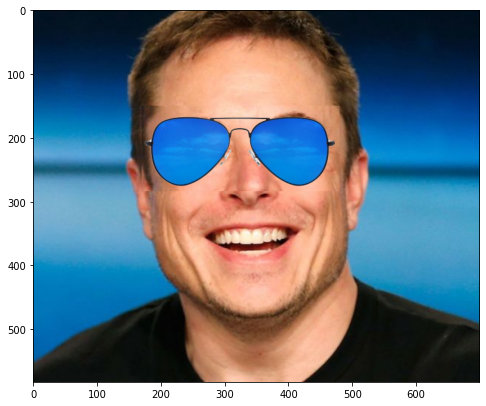

In [162]:
musk_copy3 = musk.copy()
musk_copy3[150:284,170:480]=blend_glass3
plt.imshow(musk_copy3[:,:,::-1])

## Overylay image with raindrops on ElonMusk